## Regression Machine Learning Case Study Projec

- How to work through a regression predictive modeling problem end-to-end.  

- How to use data transforms to improve model performance.  
  
- How to use algorithm tuning to improve model performance.  

- How to use ensemble methods and tuning of ensemble methods to improve model performance

## Problem Definition

We will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

## Load Dataset

In [44]:
import numpy 
from numpy import arange 
from matplotlib import pyplot 
from pandas import read_csv 
from pandas import set_option 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error

In [97]:
import pandas as pd
import numpy as np

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 

dataset = pd.read_csv("/Users/shamsuddeenmuhammad/Documents/VScode/Introduction_to_machine_learning_with_Pyhon/data/housing.csv", delim_whitespace=True, names=names)


In [49]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


 ## Analyze Data

In [50]:
#print shape of the data 
print(dataset.shape)

(506, 14)


Lets look at the data type of each attribute

In [51]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


> We can see that all of the attributes are numeric, mostly real values (float) and some have been interpreted as integers (int).

Let’s now take a peek at the first 20 rows of the data.

In [52]:
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

Let’s summarize the distribution of each attribut

In [55]:
# descriptions 
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

> The min and max values as well are the means vary a lot. We are likely going to get better results by rescaling the data in some way.

Now, let’s now take a look at the correlation between all of the numeric attributes.

In [56]:
print(dataset.corr(method='pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

> We can see that many of the attributes have a strong correlation (e.g. > 0.70 or < −0.70).

For example: NOX and INDUS has correlation of  0.77.

## Data Visualizations

## Unimodal Data Visualization

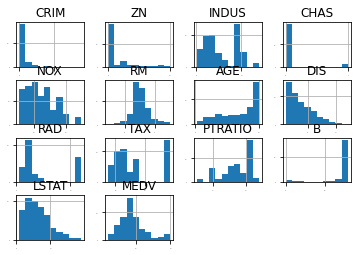

In [58]:
#histograms 
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Distributions in Data science: https://www.kdnuggets.com/2020/02/probability-distributions-data-science.html

Let’s look at the data with box and whisker plots of each attribute.

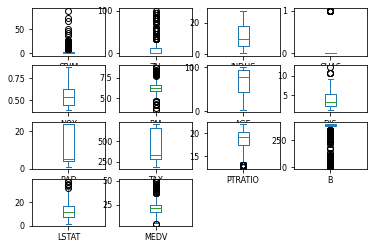

In [60]:
# box and whisker plots 
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8) 
pyplot.show()

> This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots

## Multimodal Data Visualizations

Let’s also visualize the correlations between the attributes

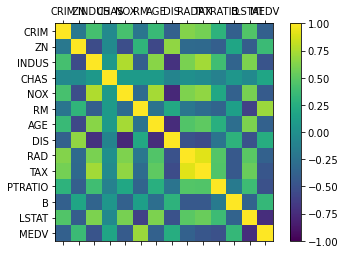

In [61]:
# correlation matrix 
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
ticks = numpy.arange(0,14,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 
pyplot.show()

The X  color shows positive correlation whereas the dark blue color shows negative correlation. We can also see some dark red and Y that suggest candidates for removal to better improve accuracy of models later on

### Summary of Ideas

So far it would be worth trying:  

1. Feature selection and removing the most correlated attributes. 

2.  Normalizing the dataset to reduce the effect of differing scales.  

3.  Standardizing the dataset to reduce the effects of differing distributions

## Validation Dataset

In [63]:
# Split-out validation  dataset 

array = dataset.values 

X = array[:,0:13]
Y = array[:,13] 
validation_size = 0.20 
seed = 7 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline

Let’s create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include

- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).  

- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

We will use 10-fold cross validation.  We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [98]:
# Test options and evaluation  metric 
num_folds = 10 
seed = 7 
scoring = 'neg_mean_squared_error'

In [64]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

> MSE (mean squared error) is a measure (loss function) for Regression model. A loss function in Machine Learning is a measure of how accurately your ML model is able to predict the expected outcome i.e the ground truth. Read more about three most use loss function (MSE, MAE, Huber loss) [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

In [71]:
# evaluate each model in turn 

results = [] 

names = [] 

for name, model in models: 
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, 
                                 scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -26.169066 (17.077921)
SVR: -67.824705 (32.801530)


> It looks like LR has the lowest MSE, followed closely by CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN

## Evaluate Algorithms: Standardization

- We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. 

- Let’s evaluate the same algorithms with a standardized copy of the dataset. 

- This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. 

- We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data

In [73]:
# Standardize the dataset 

pipelines = [] 

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) 

pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))

pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())]))) 

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]))) 

pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 


results = [] 

names = []

for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -27.444731 (20.792120)
ScaledSVR: -29.570433 (18.052964)


> We can see that scaling did have an effect on KNN, driving the error lower than the other models.

## Improve Results With Tuning

- We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. 

- But can it do better. The default value for the number of neighbors in KNN is 7. 

- We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. 

- The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7.

- Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset

In [76]:
# KNN Algorithm tuning 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21]) 
param_grid = dict(n_neighbors=k_values) 
model = KNeighborsRegressor() 
kfold = KFold(n_splits=num_folds, shuffle = True,  random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

We can display the mean and standard deviation scores as well as the best performing value for k below.

In [81]:
pd.DataFrame(grid_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001642,0.000981,0.002126,0.000443,1,{'n_neighbors': 1},-6.551951,-12.080976,-18.283171,-55.252439,-44.741250,-14.083000,-7.249250,-14.713750,-10.341250,-11.681250,-19.497829,15.769847,1
1,0.002366,0.001393,0.013743,0.017976,3,{'n_neighbors': 3},-5.417398,-12.040840,-12.203496,-49.750352,-21.156750,-18.285222,-8.398583,-41.967250,-18.250111,-12.309833,-19.977984,13.803973,2
2,0.003921,0.003895,0.010630,0.019769,5,{'n_neighbors': 5},-6.689200,-13.748537,-11.067034,-53.469366,-16.311480,-23.128990,-8.341840,-44.845300,-19.970130,-15.137790,-21.270967,14.833544,5
3,0.004567,0.008161,0.014131,0.018857,7,{'n_neighbors': 7},-6.226949,-16.080453,-13.279607,-58.129562,-15.010786,-20.217602,-9.320668,-39.061668,-24.372985,-14.072638,-21.577292,14.952592,7
4,0.003391,0.004617,0.011619,0.011016,9,{'n_neighbors': 9},-6.203695,-15.739524,-12.391415,-57.803207,-12.516963,-16.357120,-10.388645,-36.061574,-26.420846,-16.127762,-21.001075,14.701297,3
5,0.027205,0.052778,0.003214,0.001999,11,{'n_neighbors': 11},-6.434511,-14.186432,-13.409528,-59.076954,-12.937095,-16.797285,-11.498723,-35.540364,-27.881556,-17.140614,-21.490306,14.866957,6
6,0.002034,0.002480,0.022990,0.054348,13,{'n_neighbors': 13},-6.521080,-13.357483,-12.955943,-57.087088,-12.921959,-16.792902,-11.230528,-35.461266,-28.569882,-17.787197,-21.268533,14.454969,4
7,0.003214,0.003221,0.026555,0.039906,15,{'n_neighbors': 15},-7.060025,-14.583392,-12.974034,-56.414372,-13.541100,-17.364666,-11.405207,-36.529746,-29.482617,-20.325766,-21.968092,14.209894,8
8,0.005361,0.010926,0.026930,0.045720,17,{'n_neighbors': 17},-7.237698,-15.166675,-13.930354,-57.097560,-14.875633,-17.265716,-11.062323,-38.974785,-29.957401,-21.830653,-22.739880,14.492752,9
9,0.003733,0.005605,0.016358,0.024422,19,{'n_neighbors': 19},-7.854025,-16.352230,-13.484398,-58.159597,-15.993613,-17.373455,-10.927091,-41.184154,-31.122860,-22.617582,-23.506901,14.903224,10


In [82]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


> You can see that the best for k (n neighbors) is 3 providing a mean squared error of -19.497829, the best so far.

## Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM). 

- Bagging Methods: Random Forests (RF) and Extra Trees (ET)

We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

In [84]:
# ensembles 

ensembles = [] 

ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 

ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())]))) 

ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())]))) 

ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = [] 

names = [] 

for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, shuffle = True,random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ScaledAB: -15.948952 (8.656773)
ScaledGBM: -10.854067 (8.600890)
ScaledRF: -12.836665 (10.004175)
ScaledET: -9.127619 (6.471183)


We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

> We can probably do better, given that the ensemble techniques used the default parameters. In the next section we will look at tuning the Gradient Boosting to further lift the performance

## Tune Ensemble Methods

- The default number of boosting stages to perform (n estimators) is 100. 
  
- This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. 
  
- We will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [85]:
# Tune scaled GBM 
# 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400])) 
model = GradientBoostingRegressor(random_state=seed) 
kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

In [92]:
numbers = [1, 2, 3]
letters = ['a', 'b', 'c']
zipped = zip(numbers, letters)


In [95]:
zipped  # Holds an iterator object

In [94]:
type(zipped)

zip

In [96]:
list(zipped)

[(1, 'a'), (2, 'b'), (3, 'c')]

In [101]:
pd.DataFrame(grid_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.236267,0.092152,0.004281,0.004285,50,{'n_estimators': 50},-5.481359,-10.927487,-6.573100,-36.642084,-7.435947,-7.071126,-6.717308,-16.113079,-9.175756,-10.162742,-11.629999,8.833221,8
1,0.461170,0.110094,0.007664,0.014586,100,{'n_estimators': 100},-5.412025,-10.563229,-6.579591,-36.089893,-7.822432,-6.909152,-6.827620,-15.436466,-6.730498,-8.363646,-11.073455,8.772155,7
2,1.133961,0.502632,0.009957,0.014930,150,{'n_estimators': 150},-5.225549,-10.773407,-6.267163,-35.641099,-7.857168,-6.659527,-6.677740,-15.329910,-6.060382,-7.897297,-10.838924,8.734377,6
3,2.495328,0.606542,0.037595,0.059067,200,{'n_estimators': 200},-5.464684,-10.617054,-6.399911,-35.584859,-7.820983,-6.694377,-6.779740,-14.565685,-6.007274,-7.921116,-10.785568,8.657244,5
4,1.895522,0.649625,0.004444,0.005659,250,{'n_estimators': 250},-5.396245,-10.495517,-6.460672,-35.161702,-7.572761,-6.818321,-6.876358,-14.254981,-5.836170,-7.675051,-10.654778,8.540552,4
5,2.361415,0.679828,0.004916,0.003386,300,{'n_estimators': 300},-5.434832,-10.443748,-6.707328,-35.095466,-7.648669,-6.851895,-6.987611,-14.021441,-5.793195,-7.509668,-10.649385,8.497232,3
6,3.500523,0.454729,0.009325,0.011804,350,{'n_estimators': 350},-5.436682,-10.349123,-6.723344,-34.782196,-7.578705,-6.738122,-7.089015,-13.996142,-5.747247,-7.452792,-10.589337,8.413596,2
7,4.493470,0.994899,0.011191,0.013217,400,{'n_estimators': 400},-5.420766,-10.339825,-6.787734,-34.575777,-7.542901,-6.780063,-7.054276,-13.946617,-5.696099,-7.462319,-10.560638,8.353747,1


In [102]:
grid_result.best_score_

-10.560637559010726

In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print(f"({mean}, {stdev}, {param})")

Best: -10.560638 using {'n_estimators': 400}
(-11.629998657836461, 8.833221418068867, {'n_estimators': 50})
(-11.073455273415261, 8.772154692069284, {'n_estimators': 100})
(-10.838924199355183, 8.734377022610682, {'n_estimators': 150})
(-10.78556829456355, 8.657244115563072, {'n_estimators': 200})
(-10.65477776150534, 8.540551978773715, {'n_estimators': 250})
(-10.649385465510363, 8.497232113066538, {'n_estimators': 300})
(-10.589336898695533, 8.413596077609546, {'n_estimators': 350})
(-10.560637559010726, 8.353747488148537, {'n_estimators': 400})


We can see that the best configuration was n estimators=400 resulting in a mean squared error of -10.560

## Finalize Model

We will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training

In [86]:
# prepare the model 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
model = GradientBoostingRegressor(random_state=seed, n_estimators=400) 
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

We can then scale the inputs for the validation dataset and generate predictions.

In [89]:
# transform the validation dataset 
 
rescaledValidationX = scaler.transform(X_validation) 
predictions = model.predict(rescaledValidationX) 
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


We can see that the estimated mean squared error is 11.9, close to our estimate of -10.5.

## Summary

We worked through a regression predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps covered were:  

- Problem Definition (Boston house price data). 
  
-  Loading the Dataset.  

-  Analyze Data (some skewed distributions and correlated attributes).  

-  Evaluate Algorithms (Linear Regression looked good).  

-  Evaluate Algorithms with Standardization (KNN looked good). 

-  Algorithm Tuning (K=3 for KNN was best).  

-  Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good). 

-  Tuning Ensemble Methods (getting the most from Gradient Boosting). 

-  Finalize Model (use all training data and confirm using validation dataset). 

-  Working through this case study showed you how the recipes for specific machine learning tasks can be pulled together into a complete project. Working through this case study is good practice at applied machine learning using Python and scikit-learn.